In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2021-11-13 19:47:10,158: Credentials are already in use. The existing account in the session will be replaced.


In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
import math

numOfQubits = 4
readoutBits = numOfQubits
qreg = QuantumRegister(numOfQubits)
creg = ClassicalRegister(readoutBits)

gen = QuantumCircuit(qreg, creg)
#================================================#

#*************************************************
#Build initial rotation gates
def initRot(qc):
    qc.rx(math.pi, qreg[0:numOfQubits+1])
    qc.rx(math.pi, qreg[0:numOfQubits+1])
    qc.rz(math.pi, qreg[0:numOfQubits+1])
    qc.barrier()
    
#*************************************************

#initRot(gen)
#gen.draw()

#*************************************************
#Build All-to-All qubit connectivity 
def connectAllQubits(qc):
    for controlQubit in range(numOfQubits-1):
        qc.h(qreg[controlQubit])
        targetQubit = controlQubit+1
        qc.cx(qreg[controlQubit], qreg[targetQubit:numOfQubits])
    qc.barrier()
#*************************************************  

#connectAllQubits(gen)
#gen.draw()

#*************************************************
def buildCircuit(qc, layerNum):
    for layer in range(layerNum):
        initRot(qc)
        connectAllQubits(qc)
    qc.measure(qreg[0:numOfQubits], creg[0:readoutBits])
#*************************************************

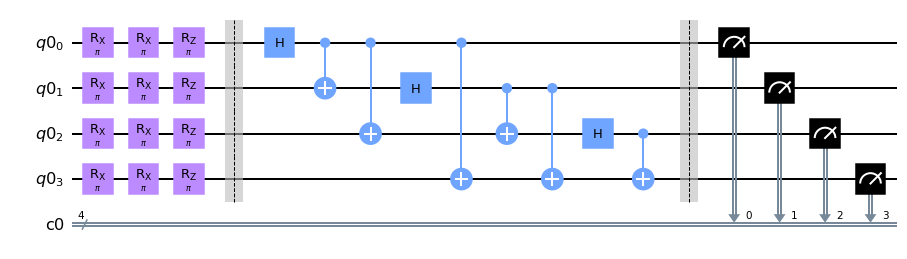

In [4]:
buildCircuit(gen, 1)
gen.draw()

In [11]:
print("Depth of circuit with "+str(numOfQubits)+" qubits has a depth of "+str(gen.depth())+" and a width of "+str(gen.width())+".")

Depth of circuit with 4 qubits has a depth of 10 and a width of 8.
